In [5]:
#(1/2)x^TQx + q^Tx
def quadratic(Q, b, x):
    r = 0.5 * x.T.dot( np.dot(Q, x) ) + b.T.dot(x)
    return r
    
    
def quadratic_grad(Q, b, x):
    r = Q.dot(x) + b
    return r

In [6]:
def descent_step(t, x, grad):
    xk = x  - t * grad
    return xk

In [10]:
#performs elementary gradient descent for a quadratic function minimization problem
#and returns an array with convergence
def run_gradient_descent_conv_func(alpha, steps, x0, Q, b, xstar):
    lambdamax = np.max( np.linalg.eigvals(Q) )
    print(np.linalg.eigvals(Q))
    x = x0
    
    dists = [] #distances from the true crit pt
    fvals = [] #function value at the current point
    
    for k in range(steps):
        grad = quadratic_grad(Q, b, x)
        xk = descent_step(alpha, x, grad)
        
        dists.append( np.linalg.norm( quadratic(Q, b, x) - quadratic(Q, b, xstar) ))
        fvals.append( quadratic(Q, b, x) )
        x = xk
    return [dists, fvals]

In [10]:
#define the quadratic function
Q = np.array([[1, 0.5], [0.5, 2]])
b = np.array([1, 1])
xstar = -np.dot(np.linalg.inv(Q), b)

[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]
[0.79289322 2.20710678]


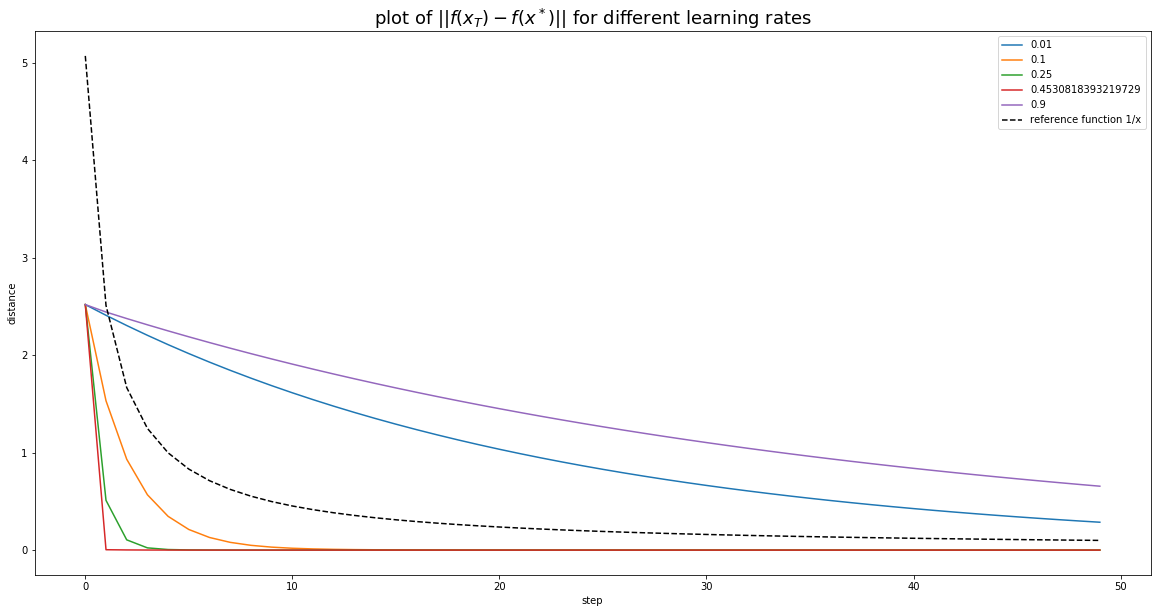

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#comparision of different learning rates
#
#
plt.figure(figsize=(20,10))

x0 = -2 + np.random.random((2,))*4

#the Lipschitz constant of the gradient
L = np.max(np.linalg.eigvals(Q))

steps = 50
alphas = [0.01, 0.1, 0.25, 1./L, 0.9]
alphaconvs = []

for alpha in alphas:
    dists, fvals = run_gradient_descent_conv_func(alpha, steps, x0, Q, b, xstar)
    alphaconvs.append(dists)

for idx, dists in enumerate(alphaconvs):
    plt.plot(dists, label=(str)(alphas[idx]))

#the constant from Theorem    
C = L * np.linalg.norm(x0 - xstar)**2

plt.plot( C / np.linspace(1, steps+1, steps), 'k--', label = "reference function 1/x" )
plt.title(r'plot of $||f(x_T) - f(x^*)||$ for different learning rates', fontsize=18)
plt.xlabel("step")
plt.ylabel("distance")
plt.legend()
plt.show()

In [22]:
??np.linspace


[0.79289322 2.20710678]
[0.71320377 4.48679623]


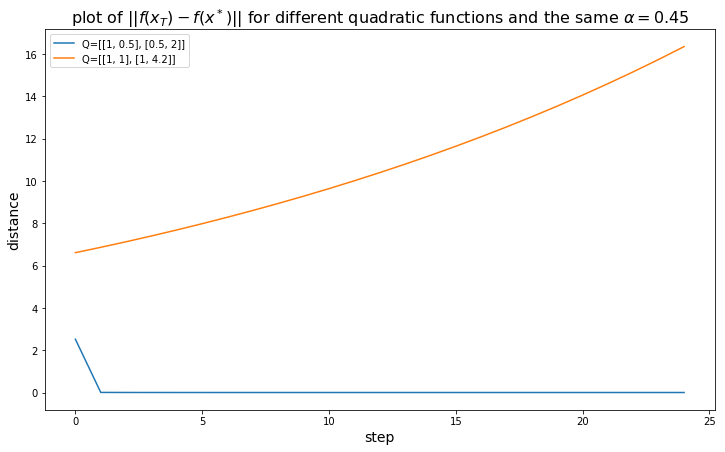

In [14]:
#a 'harder' quadratic problem
Q2 = np.array([[1, 1], [1, 4.2]])
b2 = np.array([1, 1])
xstar2 = -np.dot(np.linalg.inv(Q2), b2)

steps = 25
alpha = 0.45

dists, fvals = run_gradient_descent_conv_func(alpha, steps, x0, Q, b, xstar)
dists2, fvals2 = run_gradient_descent_conv_func(alpha, steps, x0, Q2, b2, xstar2)

plt.figure(figsize=(12,7))
plt.plot(dists, label="Q=[[1, 0.5], [0.5, 2]]")
plt.plot(dists2, label="Q=[[1, 1], [1, 4.2]]")
plt.title(r'plot of $||f(x_T) - f(x^*)||$ for different quadratic functions and the same $\alpha=0.45$', fontsize=16)
plt.xlabel("step", fontsize=14)
plt.ylabel("distance", fontsize=14)
#plt.ylim((0,0.01))
plt.legend()
plt.show()

In [17]:
print("max eigenvalue of [[1, 0.5], [0.5, 2]]=%f" % np.max(np.linalg.eigvals(Q)))
print("max eigenvalue of [[1, 1], [1, 4.2]]=%f" % np.max(np.linalg.eigvals(Q2)))

max eigenvalue of [[1, 0.5], [0.5, 2]]=2.207107
max eigenvalue of [[1, 1], [1, 4.2]]=4.486796


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#function for generating random positive definite matrix 
#having the provided condition number
def get_randQ( n):
    M = np.random.random((n,n))
    Q = M.dot(M.T)
    return Q

DIM = 10000
#Q = get_randQ(DIM)
b = np.random.random(DIM)
#eigv = np.linalg.eigvals(Q)
#check if the matrix is really positive definite
#print( np.all((eigv > 0) == True))

In [4]:
#attempt to compute the minimum of the quadratic equation using the analytic formula
#this operation is very time consuming and likely will not finish
xmin = np.linalg.inv(Q)

KeyboardInterrupt: 

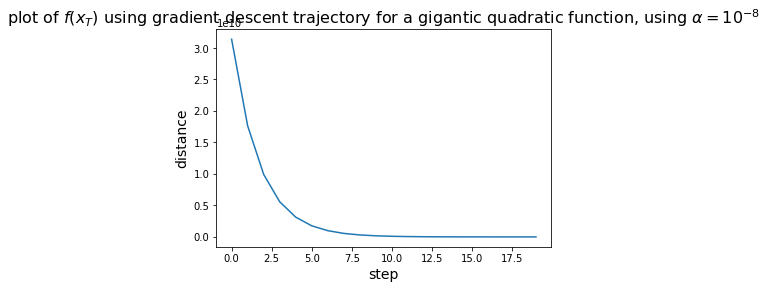

In [27]:
#compute the maximal eigenvalue of Q
#L = np.max(np.linalg.eigvals(Q))
#this also takes too long
#define a very small time-step
alpha = 1e-08

fvals = []
x = np.random.random((DIM,))
for k in range(20):
    grad = quadratic_grad(Q, b, x)
    xk = descent_step(alpha, x, grad)
    fvals.append( quadratic(Q, b, x) )
    x = xk    

plt.plot(fvals)
plt.title(r'plot of $f(x_T)$ using gradient descent trajectory for a gigantic quadratic function, using $\alpha=10^{-8}$', fontsize=16)
plt.xlabel("step", fontsize=14)
plt.ylabel("distance", fontsize=14)
plt.show()

In [41]:
??np.save